In [1]:
from Validation import Validation
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)

Dataset has (5580, 181)
Count of Positive and Negative samples
Columns with NA values are []
      index  label
0  Basement    930
1     Chill    930
2      Deep    930
3  Diffrent    930
4      Push    930
5      Vibe    930


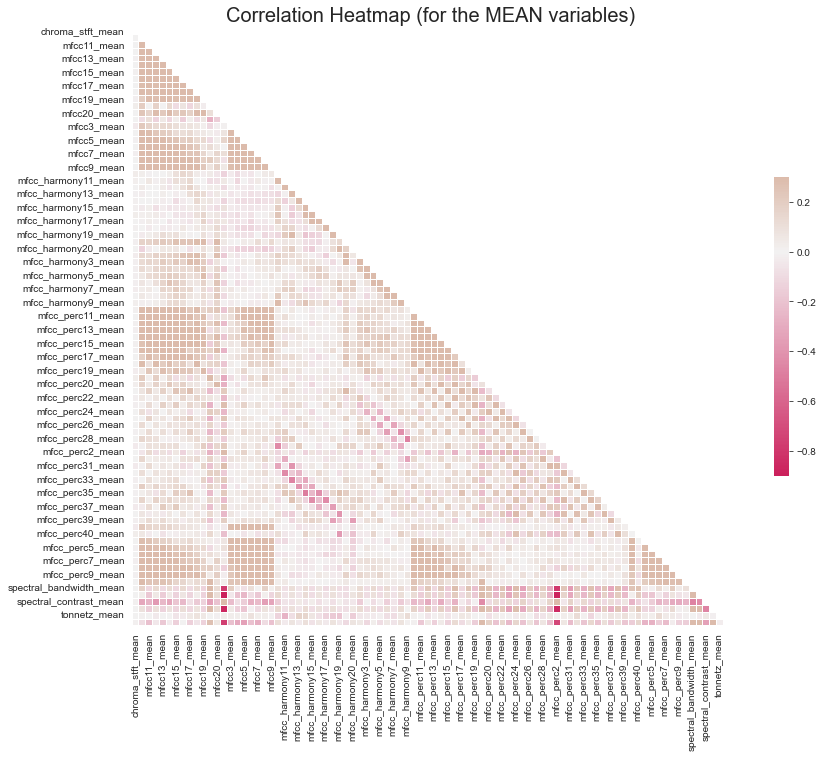

In [4]:
val = Validation()
val.loadDataFrameFile()
val.normalizeDataFrame()
val.generateInformation()
val.generateHeadMap()
# val.generatePCAChart()
# val.generateBetterPCACharts()
# val.generateOldPCACharts()